# Sentiment Analysis of Amazon Reviews

# A. Import Library

In [5]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# B. Data Loading

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')


In [7]:
df = pd.read_csv("amazon_reviews.csv")
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,31-08-2015
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,31-08-2015
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,31-08-2015
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,31-08-2015
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,31-08-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,03-10-2014
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,03-10-2014
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",03-10-2014
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,03-10-2014


In [8]:
df = df.sort_values("total_votes", ascending=False)
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,03-10-2014
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,03-10-2014
29276,US,41866357,RK0PC6AO7W6KX,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1643,1710,N,N,Detailed review of the Fire HD 7 - A great ent...,The Fire HD 7 is a great entry-level Fire Tabl...,30-11-2014
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",03-10-2014
13668,US,53068500,R1659B74M7GZIC,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,1,1305,1427,N,Y,all this would've been fine and dandy if not f...,I bought this for my daughter for Christmas. ...,09-03-2015


In [9]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0]*100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.around(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print("TYPES".center(82,'~'))
    print(df.dtypes)
    print("".center(82, '~'))
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(82, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number])
    if not numeric_columns.empty:
        print(numeric_columns.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    else:
        print("No numeric columns found.")

check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 30846
Columns: 15
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 Missing Values  Ratio
review_headline               2   0.01
review_body                   4   0.01
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        

In [10]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                                'Classes': [dataframe[i].nunique()
                                            for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,review_id,30846
1,customer_id,30845
2,review_body,27761
3,review_headline,15715
4,review_date,333
5,total_votes,80
6,helpful_votes,71
7,product_id,21
8,star_rating,5
9,verified_purchase,2


In [11]:
constraints = ['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#EB0CD5']
def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows = 1, cols = 2,
                        subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(),
                        x = [str(i) for i in df[column_name].value_counts().index],
                        text = df[column_name].value_counts().values.tolist(),
                        textfont = dict(size=14),
                        name = column_name,
                        textposition = 'auto',
                        showlegend = False,
                        marker = dict(color = constraints,
                        line = dict(color = '#DBE6EC', width = 1))),
                row = 1, col = 1)
    fig.add_trace(go.Pie(labels = df[column_name].value_counts().keys(),
                        values = df[column_name].value_counts().values,
                        textfont = dict(size = 18),
                        textposition = 'auto',
                        showlegend = False,
                        name = column_name,
                        marker = dict(colors = constraints)),
                row = 1, col = 2)
    fig.update_layout(title={'text': column_name,
                            'y': 0.9,
                            'x': 0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'},
                        template = 'plotly_white')
    iplot(fig)
    fig.show()

In [12]:
categorical_variable_summary(df, 'total_votes')

In [13]:
df.review_body.head()

30841    [[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...
30842    I'm writing this review with the benefit of be...
29276    The Fire HD 7 is a great entry-level Fire Tabl...
30843    I purchased this Kindle for my grandma, becaus...
13668    I bought this for my daughter for Christmas.  ...
Name: review_body, dtype: object

In [14]:
review_example = df.review_body[1031]
review_example

'My new kindle is really to.use. The grafics are awesome.'

In [15]:
review_example = re.sub("[^a-zA-Z]", '', review_example)
review_example

'MynewkindleisreallytouseThegraficsareawesome'

In [16]:
review_example = review_example.lower().split()
review_example

['mynewkindleisreallytousethegraficsareawesome']

In [17]:
rt = lambda x: re.sub("[^a-zA-Z]", ' ', str(x))
df["review_body"] = df["review_body"].map(rt)
df["review_body"] = df["review_body"].str.lower()
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,videoid mop b gs rl ly i purchased the orig...,03-10-2014
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,i m writing this review with the benefit of be...,03-10-2014
29276,US,41866357,RK0PC6AO7W6KX,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1643,1710,N,N,Detailed review of the Fire HD 7 - A great ent...,the fire hd is a great entry level fire tabl...,30-11-2014
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,i purchased this kindle for my grandma becaus...,03-10-2014
13668,US,53068500,R1659B74M7GZIC,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,1,1305,1427,N,Y,all this would've been fine and dandy if not f...,i bought this for my daughter for christmas ...,09-03-2015


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df[['polarity', 'subjectivity']] = df['review_body'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df.iterrows():
    score = SentimentIntensityAnalyzer().polarity_scores(row['review_body'])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "Neutral"


In [19]:
df[df["sentiment"] == "Positive"].sort_values("total_votes", ascending=False).head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,sentiment
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,videoid mop b gs rl ly i purchased the orig...,03-10-2014,0.307995,0.553035,Positive
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,i m writing this review with the benefit of be...,03-10-2014,0.173156,0.391590,Positive
29276,US,41866357,RK0PC6AO7W6KX,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1643,1710,N,N,Detailed review of the Fire HD 7 - A great ent...,the fire hd is a great entry level fire tabl...,30-11-2014,0.192453,0.484858,Positive
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,i purchased this kindle for my grandma becaus...,03-10-2014,0.272143,0.590873,Positive
30740,US,51426892,RMR0Q68AUSRB9,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,2,588,664,N,Y,My husband and I both have the Kindle HD Fire ...,i ordered this kindle for my daughter my husb...,20-10-2014,0.214394,0.484091,Positive


In [20]:
categorical_variable_summary(df, 'sentiment')
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,sentiment
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,videoid mop b gs rl ly i purchased the orig...,03-10-2014,0.307995,0.553035,Positive
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,i m writing this review with the benefit of be...,03-10-2014,0.173156,0.391590,Positive
29276,US,41866357,RK0PC6AO7W6KX,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1643,1710,N,N,Detailed review of the Fire HD 7 - A great ent...,the fire hd is a great entry level fire tabl...,30-11-2014,0.192453,0.484858,Positive
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,i purchased this kindle for my grandma becaus...,03-10-2014,0.272143,0.590873,Positive
13668,US,53068500,R1659B74M7GZIC,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,1,1305,1427,N,Y,all this would've been fine and dandy if not f...,i bought this for my daughter for christmas ...,09-03-2015,0.092938,0.373396,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13311,US,20342948,RZ4EL0ZIEUL56,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,it s great for my husband and i and our kids,16-03-2015,0.800000,0.750000,Positive
2675,US,38337264,R1XVX09W227GN5,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,I love my Kindle Fire,i love my kindle fire i already had a nook bu...,19-07-2015,0.500000,0.550000,Positive
2678,US,25973038,R2CD14AULDG4MI,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,love it,19-07-2015,0.500000,0.600000,Positive
13306,US,22089440,R2DY0GOYEO4KOS,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,N,"Very Happy to have this item, Great Gift!!!",i received my fire hd for christmas gift and h...,16-03-2015,0.040104,0.502083,Positive


In [21]:
from textblob import TextBlob
import re

def classify_review(review_text):
    # Preprocess review text
    review_text = re.sub("[^a-zA-Z]", ' ', review_text)
    review_text = review_text.lower().split()

    # Calculate polarity score using TextBlob
    polarity_score = TextBlob(' '.join(review_text)).sentiment.polarity

    # Classify sentiment based on polarity score
    if polarity_score > 0:
        return "Positive"
    elif polarity_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Example usage:
new_review = "i got headache after using this product"
feedback = classify_review(new_review)
print("Review sentiment:", feedback)


Review sentiment: Neutral


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import re

# Preprocess text data
def preprocess_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert text to lowercase
    return text

# Load and preprocess dataset (assuming df contains your dataset)
df['clean_text'] = df['review_body']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Save the SVM model
joblib.dump(svm_classifier, "sentiment_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Evaluate the classifier
y_pred = svm_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Function to classify new text
def classify_text(new_text):
    cleaned_text = preprocess_text(new_text)
    tfidf_vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    sentiment = svm_classifier.predict(tfidf_vectorized_text)
    return sentiment[0]


Accuracy: 0.9226904376012965


In [23]:
# Example usage:
new_review = "product is normal"
predicted_sentiment = classify_text(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Neutral


Positive


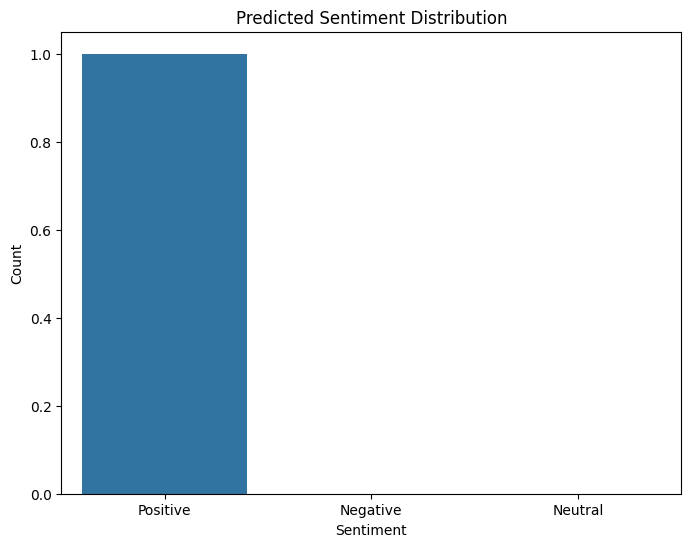

Predicted sentiment: Positive


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to classify text and visualize sentiment
def classify_and_visualize_text(new_text):
    # Classify the text
    predicted_sentiment = classify_text(new_text)
    print(predicted_sentiment)

    # Plot the sentiment along with the input text
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[predicted_sentiment.count('Positive'),
                                                          predicted_sentiment.count('Negative'),
                                                          predicted_sentiment.count('Neutral')])
    plt.title('Predicted Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

# Example usage:
new_review = "I dont't have any complaints, Loved"
classify_and_visualize_text(new_review)


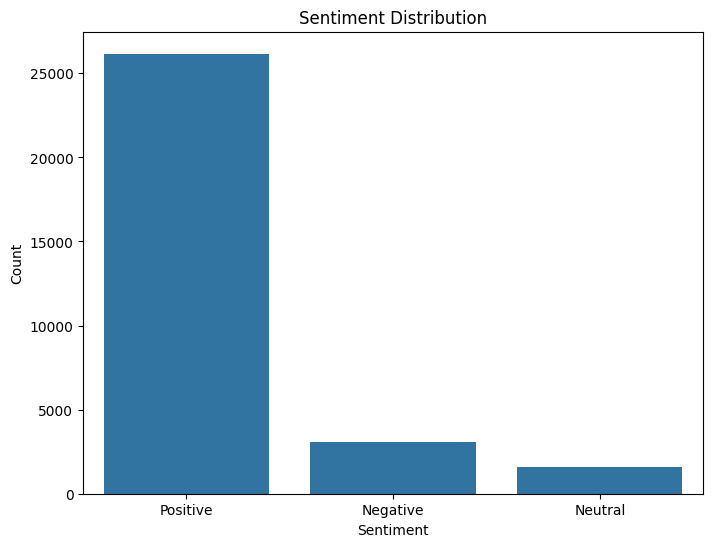

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Sentiment Distribution
def plot_sentiment_distribution(data):
    sentiment_counts = data.value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Plot sentiment distribution in the dataset
plot_sentiment_distribution(df['sentiment'])


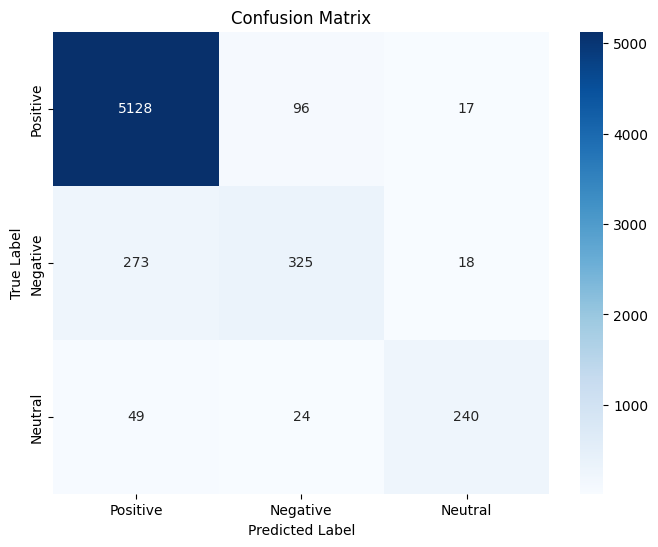

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Visualization of Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Plot confusion matrix for model performance evaluation
plot_confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative', 'Neutral'])
